<a href="https://colab.research.google.com/github/tharund7/IT1703/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.	Load the data into a Python session as a Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary


In [25]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('auto-mpg.csv')

# Checking Dataset
df




,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [27]:
# Checking data types

print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


2.	Split the data 75% training and 25% testing


In [17]:
from sklearn.model_selection import train_test_split

# Spliting the data
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

### 3.	Visualize necessary columns in the data. After this point, you should have three lists:
•	Columns that are numeric and have symmetric distributions
•	Columns that are numeric and have skewed distributions
•	Columns that are categorical:

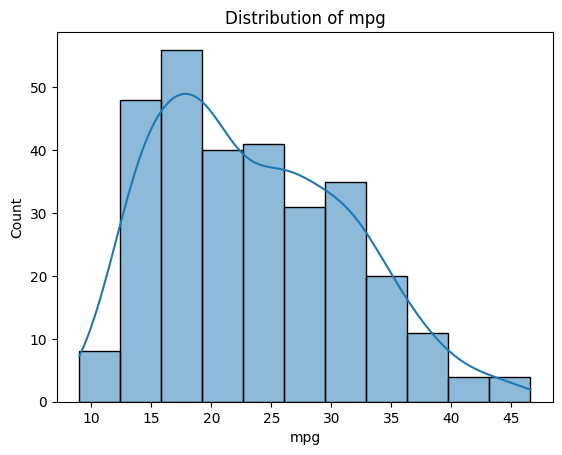

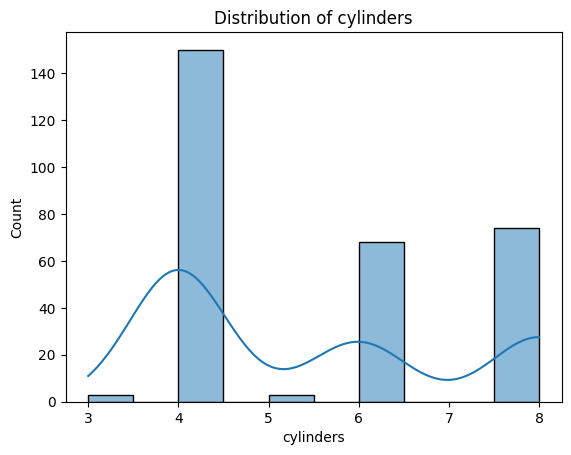

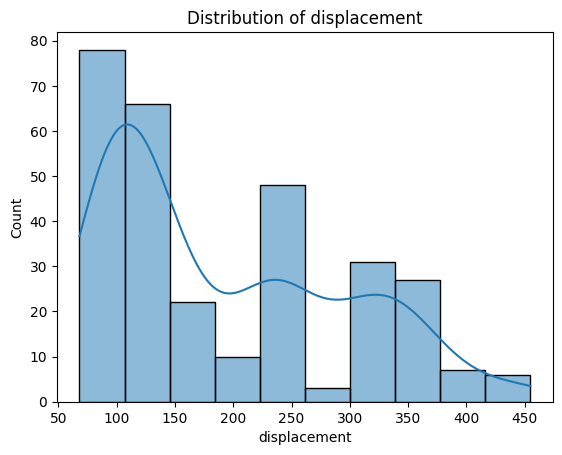

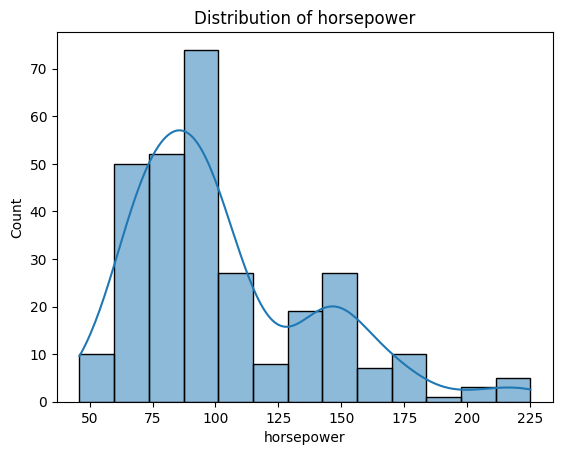

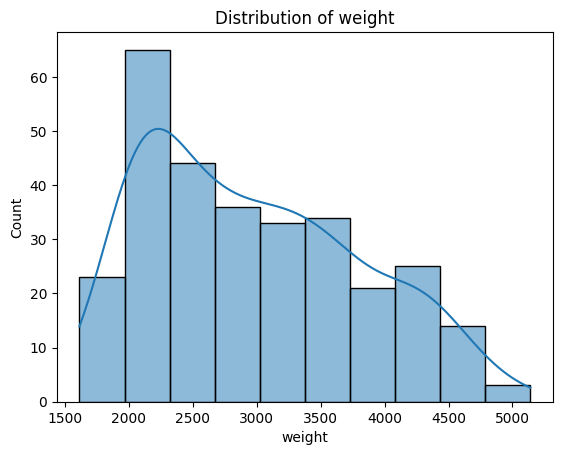

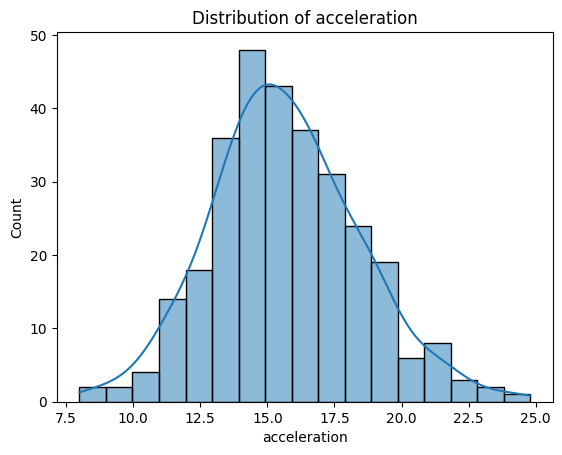

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing  distributions of numeric columns to categorize them
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for col in numeric_columns:
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Based on visualization, categorize columns (example categorization, adjust based on actual visualization)
symmetric_columns = ['acceleration']
skewed_columns = ['mpg', 'displacement', 'horsepower', 'weight']
categorical_columns = ['cylinders', 'model year', 'origin']

### 4.	Build a pipeline as follows:
•	Numeric and symmetric columns: 	Imputation > Standardization
•	Numeric and skewed columns:		Imputation > Log transformation > Standardization
•	Categorical columns: 			One hot encoder


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define the pipeline steps
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', numeric_symmetric_pipeline, symmetric_columns),
        ('num_skew', numeric_skewed_pipeline, skewed_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

### 5.	Train the pipeline on the training data. Then perform transformation on the training data and testing data.


In [20]:
# Fit the preprocessor on the training data
preprocessor.fit(train_df)

# Transform both training and testing data
train_processed = preprocessor.transform(train_df)
test_processed = preprocessor.transform(test_df)

### 6.	Print the shape of the processed training data and processed testing data.

In [21]:
print(f'Shape of processed training data: {train_processed.shape}')
print(f'Shape of processed testing data: {test_processed.shape}')

Shape of processed training data: (298, 26)
Shape of processed testing data: (100, 26)
